# Wine Quality Prediction

In [27]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import  RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

In [4]:
# import the raw dataset
raw_df = pd.read_csv("D:\Sandeep- DSDJ\python docs\winequality-red.csv")


### Begin Exploratory Data Analysis

In [5]:
# Let us know look at the few data columns
print(raw_df.head(10))


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0

In [6]:
# Now, let us see the data_types of our columns
print(raw_df.describe())


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [7]:
# Now we have to see if we have "null" valued columns
print(raw_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [8]:
# Looks like we have all non-null columns, that's great!

#Now let us seperate our target varaible
target_df = raw_df['quality']

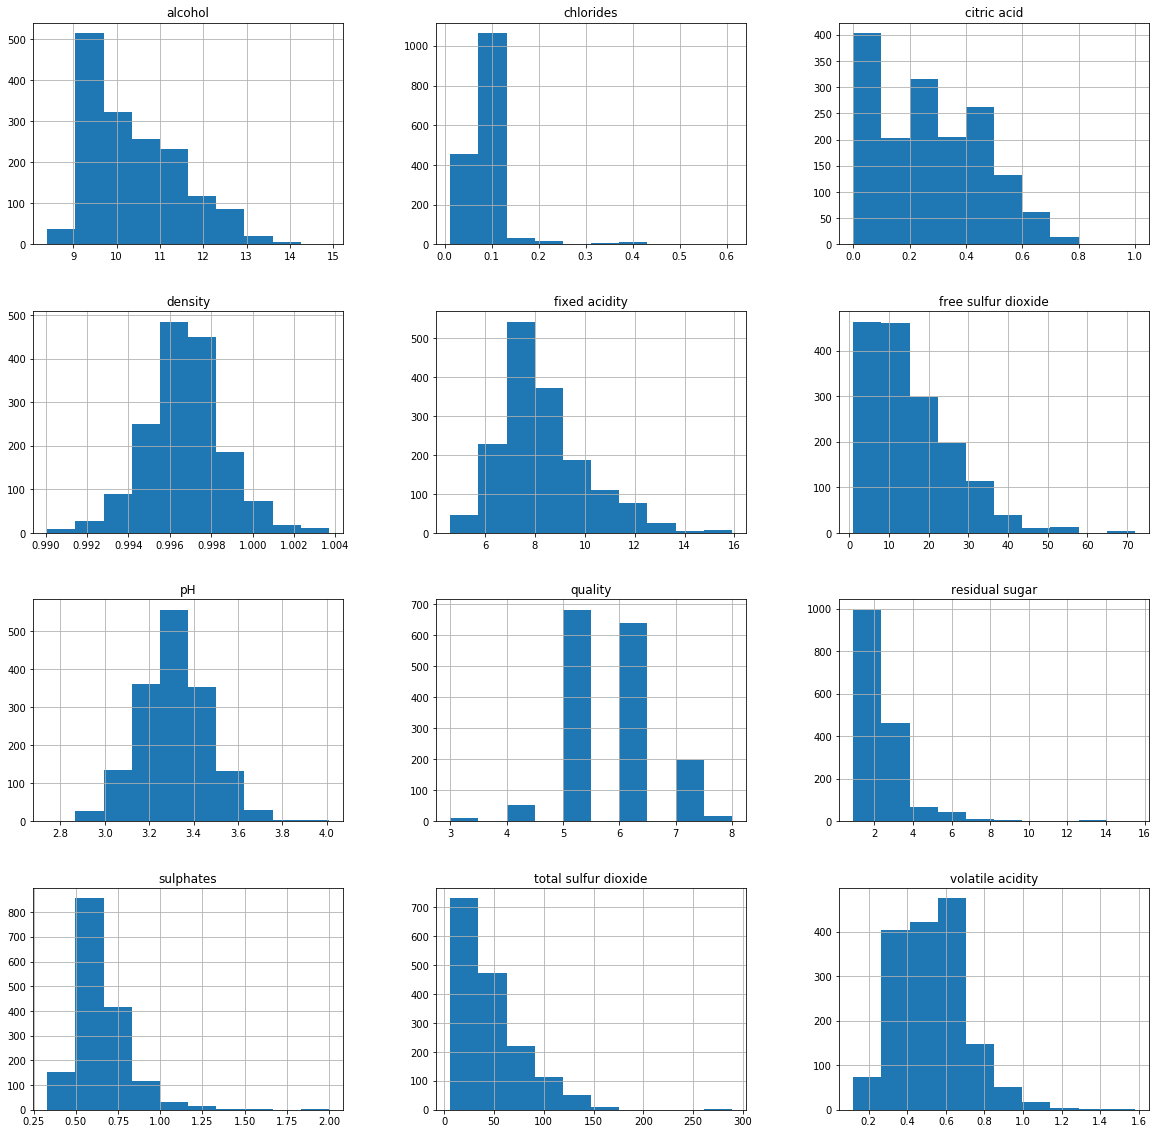

In [9]:
# Let us know perform a few visulizations to get better understanding of the data
raw_df.hist(bins=10, figsize=(20, 20))
plt.show()

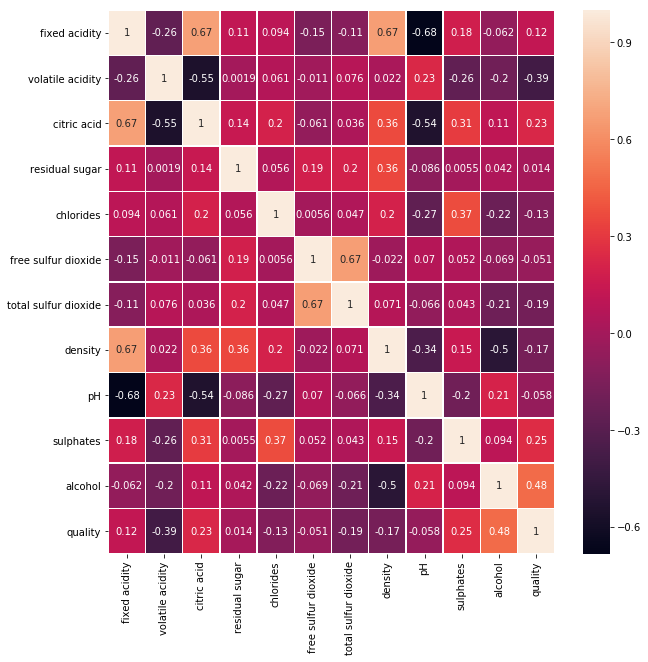

In [10]:
# Now, let us visualize a correlation matrix
corr_matrix = raw_df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, ax=ax)
plt.show()

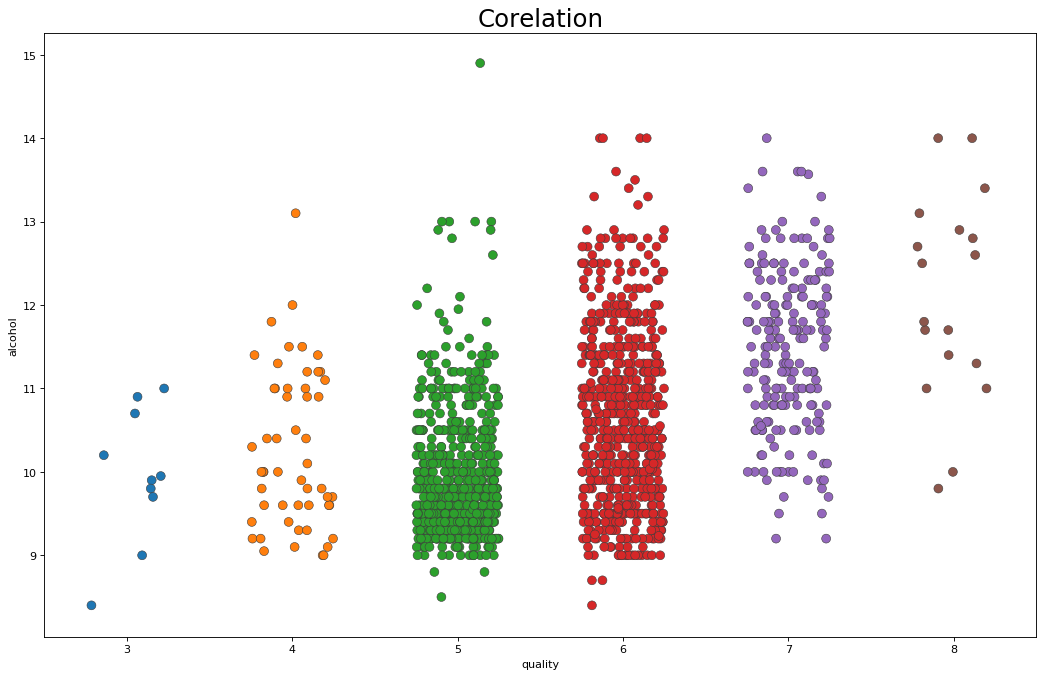

In [11]:
#Let us now see the relationship between alcohol and quality
fig,ax = plt.subplots(figsize = (16,10),dpi = 80)
sns.stripplot(raw_df['quality'],raw_df['alcohol'], jitter = 0.25 , size = 8 , ax=ax , linewidth = .5)
plt.title('Corelation',fontsize = 22)
plt.show()

In [12]:
# Now let us spot some outliers in the data
stat = target_df.describe()
print(stat)
IQR = stat['75%'] - stat['25%']
upper = stat['75%'] + 1.5 * IQR
lower = stat['25%'] - 1.5 * IQR
print('The upper and lower bounds for suspected outliers are {} and {}.'.format(upper, lower))

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64
The upper and lower bounds for suspected outliers are 7.5 and 3.5.


In [13]:
# Now let us classify the data as "good" or "bad" by taking a range of quality measures
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
raw_df['quality'] = pd.cut(raw_df['quality'], bins=bins, labels=group_names)

# Now let us perform encoding to transform  the quality column to newly created columns
label_quality = LabelEncoder()
raw_df['quality'] = label_quality.fit_transform(raw_df['quality'])

# Now let us look at the first few columns to see how we transformed
print(raw_df.head(10))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0

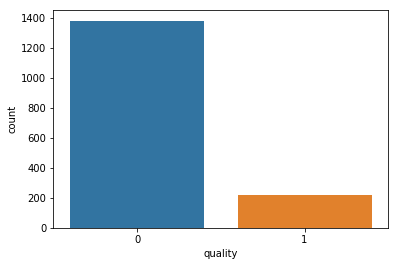

In [14]:
# Now, let us see how many calssify as good or bad
sns.countplot(raw_df['quality'])
plt.show()

 We can observe that, the count of class '0' is much higher than class '1'. This is an imbalence dataset
 we will deal with it later in the process

In [15]:
# Let us now, seperate the feature and target df for our model
feature_df = raw_df.drop('quality', axis=1)
target_df = raw_df['quality']

### Building a Model

In [16]:
# Split feature and target df into train,test data sets
X_train, X_Test, y_train, Y_Test = train_test_split(feature_df, target_df, test_size=0.2, random_state=42)

As we can see we have an imbalance data set, we need to do sampling inorder to overcome this

#### Using sampling techniques to treat imbalance dataset

In [51]:
# Upsample minority class
X_train_u, y_train_u = resample(X_train[y_train == 1],
                                y_train[y_train == 1],
                                replace=True,
                                n_samples=X_train[y_train == 0].shape[0],
                                random_state=1)

X_train_u = np.concatenate((X_train[y_train == 0], X_train_u))
y_train_u = np.concatenate((y_train[y_train == 0], y_train_u))

# Upsample using SMOTE
sm = SMOTE(random_state=12)
x_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

# Downsample majority class
X_train_d, y_train_d = resample(X_train[y_train == 0],
                                y_train[y_train == 0],
                                replace=True,
                                n_samples=X_train[y_train == 1].shape[0],
                                random_state=1)
X_train_d = np.concatenate((X_train[y_train == 1], X_train_d))
y_train_d = np.concatenate((y_train[y_train == 1], y_train_d))

print("Original shape:", X_train.shape, y_train.shape)
print("Upsampled shape:", X_train_u.shape, y_train_u.shape)
print("SMOTE sample shape:", x_train_sm.shape, y_train_sm.shape)
print("Downsampled shape:", X_train_d.shape, y_train_d.shape)

# Create the Original, Upsampled, and Downsampled training sets
methods_data = {"Original": (X_train, y_train),
                "Upsampled": (X_train_u, y_train_u),
                "SMOTE": (x_train_sm, y_train_sm),
                "Downsampled": (X_train_d, y_train_d)}

# Loop through each type of training sets and apply 5-Fold CV using RandomForest Classifier
# By default in cross_val_score StratifiedCV is used
for method in methods_data.keys():
    rf_results = cross_val_score(RandomForestClassifier(), methods_data[method][0], methods_data[method][1], cv=5,
                                 scoring='f1')
    print(f"The best F1 Score for {method} data:")
    print(rf_results.mean())

#Calculating Cross validation scores
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
rf_cv = cross_val_score(RandomForestClassifier(class_weight='balanced'), X_train, y_train, cv=cv, scoring='f1').mean()
print("cross validation score is:" ,rf_cv)

Original shape: (1279, 11) (1279,)
Upsampled shape: (2218, 11) (2218,)
SMOTE sample shape: (2218, 11) (2218,)
Downsampled shape: (340, 11) (340,)
The best F1 Score for Original data:
0.563747182099
The best F1 Score for Upsampled data:
0.972045358771
The best F1 Score for SMOTE data:
0.935220696935
The best F1 Score for Downsampled data:
0.802213313057
cross validation score is: 0.52862317767


We are selecting Upsampling as it gives us the best f1 score

In [32]:
# Import our required models
svc = SVC()
rf = RandomForestClassifier()
# Train our model and Predict values

#SupportVectorClassifier
svc.fit(X_train_u, y_train_u)
pred_vals = lr.predict(X_Test)
#print(pred_vals)
print(classification_report(Y_Test, pred_vals ))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88       273
           1       0.43      0.87      0.57        47

    accuracy                           0.81       320
   macro avg       0.70      0.84      0.73       320
weighted avg       0.89      0.81      0.83       320



We achieved 81% accuracy


In [19]:
#RandomForestClassifier
rf.fit(X_train_u, y_train_u)
pred_vals = rf.predict(X_Test)
#print(pred_vals)
print(classification_report(Y_Test, pred_vals))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       273
           1       0.71      0.57      0.64        47

    accuracy                           0.90       320
   macro avg       0.82      0.77      0.79       320
weighted avg       0.90      0.90      0.90       320



Kudos! we now achieved 91% accuracy

We achieved 91% accuracy with RFClassifier , hence it is the best of the two models